This project aims mostly to practice some data analysis skills using relatively basic summary statistics

The assumption of this project is to find the best market to advertise in for an e-learning company that offers courses on programming.

# Dataset used in this project
I will be using data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). Free Code Camp runs a popular Medium publication, so their survey attracted a relatively wide of new coders
The dataset can be obtained [here](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False)
survey.head()

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  ...  YouTubeFCC  \
0                   NaN                   NaN  ...         NaN   
1                   NaN                   NaN  ...         1.0   
2                   NaN                   NaN  ...         NaN   
3                   NaN                   NaN  ...         1.0   
4                   NaN                   NaN  ...         NaN   

   YouTubeFunFunFunction  YouTubeGoogleDev  YouTubeLearnCode  \
0                    NaN               NaN               NaN   
1                    NaN               NaN               NaN   
2                    NaN               NaN               1.0   
3                    1.0               NaN               NaN   
4                    NaN               NaN               NaN   

   YouTubeLevelUpTuts  YouTubeMIT  YouTubeMozillaHacks YouTubeOther  \
0                 NaN         NaN                  NaN          NaN   
1                 NaN         NaN                  NaN          NaN   
2                 1.0         NaN                  NaN          NaN   
3                 1.0         NaN                  NaN          NaN   
4                 NaN         NaN                  NaN          NaN   

   YouTubeSimplilearn  YouTubeTheNewBoston  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 136 columns]

We are interested in the locations of the survey population, the locations with greatest number of new coders and how much money potential clients would be interested to spend.
The dataset has a large number of variables that are not of interest for this project so we will filter out only a selected number of columns.

In [165]:
survey.columns[:40]

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet'],
      dtype='object')

In [166]:
survey.columns[40:]

Index(['HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt',
       'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income',
       'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev',
       'IsUnderEmployed', 'JobApplyWhen', 'JobInterestBackEnd',
       'JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps',
       'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev',
       'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther',
       'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX', 'JobPref',
       'JobRelocateYesNo', 'JobRoleInterest', 'JobWherePref', 'LanguageAtHome',
       'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 'NetworkID',
       'Part1EndTime', 'Part1StartTime', 'Part2EndTime', 'Part2StartTime',
       'PodcastChangeLog', 'PodcastCodeNewbie', 'PodcastCodePen',
       'PodcastDevTea', 'PodcastDotNET', 'PodcastGiantRobots', 'PodcastJSAir',
       'PodcastJSJabber', 'PodcastNone', 'Podca

In [167]:
relevant_cols = ["Age", "Gender", "CountryLive", "MoneyForLearning", "JobRoleInterest", "MonthsProgramming"] 
#MoneyForLearning = money spent on learnng to code (aside from university tuition) in USD
survey = survey[relevant_cols]

# Is the sample representative (enough) for our population of interest?
Does this sample contain enough respondents interested in the kind of roles that our company offers courses for? (Assuming that offer mostly courses about web and mobile development, but also cover many other domains, like data science, game development, etc.)

In [168]:
survey["JobRoleInterest"].value_counts().tail()

  User Experience Designer,   Mobile Developer, Full-Stack Web Developer,   Front-End Web Developer, Game Developer     1
  Mobile Developer, Full-Stack Web Developer, Game Developer                                                            1
Full-Stack Web Developer,   Data Scientist, Information Security, Data Engineer,   DevOps / SysAdmin                    1
Back-End Web Developer,   Front-End Web Developer, Information Security,   Product Manager, Full-Stack Web Developer    1
Data Engineer, Back-End Web Developer,   DevOps / SysAdmin,   Front-End Web Developer, Full-Stack Web Developer         1
Name: JobRoleInterest, dtype: int64

In [169]:
# respondent can tick more than one response - this needs to be sorted
survey["JobRoleInterest"] = survey["JobRoleInterest"].str.strip().str.split(r", +")

In [170]:
job_int_count_dict = {}
for index, int_list in survey["JobRoleInterest"].iteritems():
    if type(int_list) == list:
        for value in int_list:
            if value in job_int_count_dict:
                job_int_count_dict[value] += 1
            else:
                job_int_count_dict[value] = 1

In [171]:
job_int_count = pd.Series(job_int_count_dict)

In [172]:
job_int_count.sort_values(ascending=False,inplace=True)
job_int_pcts = (job_int_count/job_int_count.sum())*100
print("Top 15 Job Interests in %")
job_int_pcts.head(15)

Top 15 Job Interests in %


Full-Stack Web Developer      18.575221
Front-End Web Developer       15.632743
Back-End Web Developer        12.265487
Mobile Developer              10.194690
Data Scientist                 7.269912
Game Developer                 7.203540
User Experience Designer       6.500000
Information Security           5.867257
Data Engineer                  5.522124
DevOps / SysAdmin              4.101770
Product Manager                3.601770
Quality Assurance Engineer     2.203540
Software Engineer              0.048673
Software Developer             0.026549
Software engineer              0.017699
dtype: float64

(0.0, 20.0)

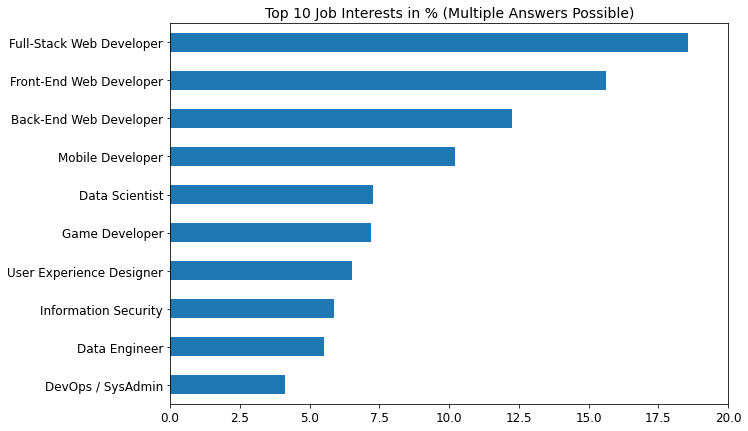

In [173]:
%matplotlib inline
ax = job_int_pcts.head(10).sort_values().plot.barh(figsize = (10,7), fontsize = 12)
ax.set_title("Top 10 Job Interests in % (Multiple Answers Possible)", fontsize= 14)
ax.set_xlim(0,20)

Most respondents were interested in some form of web development, Data Science and Game Development follows after that. So the sample should be representative enough for the target group.

# Where are new coders located?
After we concluded that the sample has enough respondents of the right categories we can analyze which countries have the highest number of the target population.

In [174]:
# Drop out participants that did not indicate their job interests
survey_filtered = survey.copy()
survey_filtered = survey_filtered[survey_filtered["JobRoleInterest"].notna()]

In [175]:
survey_filtered["CountryLive"].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [176]:
survey_filtered["CountryLive"].value_counts(normalize=True).head(5)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64

In [177]:
country_t10_pct=survey_filtered["CountryLive"].value_counts(normalize=True).head(5).sort_values()
ax = (country_t10_pct*100).plot.barh(figsize = (10,7), fontsize = 12)
ax.set_title("Top 5 Countries of New Coders in %", fontsize= 14)
ax.set_xlim((0,50))

(0.0, 50.0)

Most respondents that indicated which job role they would be interested in come either from the USA (46%), India (8%), UK (5%) or Canada (4%).
Since English is an official language in all of these countries, they would be a good match to advertise in (assuming our courses are in English). Further analysis will determine if these countries actually have new coders that are also willing to pay for a monthly subscription (assuming $59).

# Which country has the most profitable new coders?
Profitable in this context is defined as new coders that would be willing to spent $59 per month on a subscription service to learn coding.

MoneyForLearning indicated the amount of USD spent on learning how to code *from the moment they started coding*. This means we should be able to infer an approximate amount each respondent was willing to pay *per month*.

In [178]:
survey_filtered["MonthsProgramming"]
# treat 0 months programming as 1 (else we will divide by 0 in the next step)
survey_filtered["Money/Month"] = survey_filtered["MoneyForLearning"] / \
    survey_filtered["MonthsProgramming"].replace(0, 1)

In [179]:
# how  many missing values for money/month?
survey_filtered["Money/Month"].isna().count()

6992

In [190]:
# Filter out null values for Money/Month
survey_filtered = survey_filtered[survey_filtered["Money/Month"].notna()]
# Group by country and get avg. amount spent/month - only for countries of interest
mask = survey_filtered["CountryLive"].isin(["United States of America", "India", "United Kingdom", "Canada"])
country_group = survey_filtered[mask].groupby("CountryLive")
country_group["Money/Month"].mean().sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: Money/Month, dtype: float64

These values look counter-intuitive: Canada and UK are *lower* than the values for India. Given the GDP of these countries we should make sure, these are the correct values.

## Filter out extreme outliers

<AxesSubplot:title={'center':'Money/Month'}, xlabel='CountryLive'>

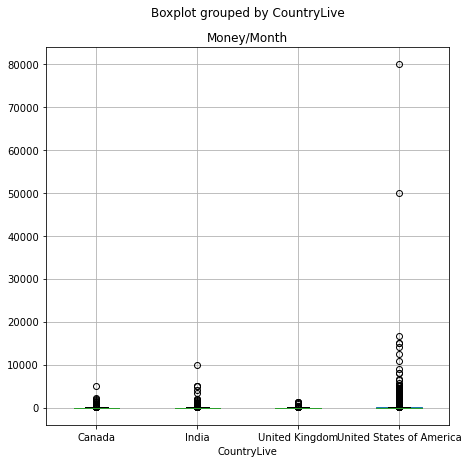

In [207]:
# Inspect outliers
survey_filtered[mask].boxplot(by="CountryLive",column="Money/Month",figsize=(7,7))

In [227]:
# Filter out extreme outliers (> IQR x3 rule)
countries_interest_li = ["United States of America", "India", "United Kingdom", "Canada"]

survey_top4_c = pd.DataFrame()

for c in  countries_interest:
    df = survey_filtered[survey_filtered["CountryLive"]==c]
    q1 = df["Money/Month"].quantile(0.25)
    q3 = df["Money/Month"].quantile(0.75)
    IQR = q3-q1
    upper_bound = q3 + (IQR*3)
    df = df[df["Money/Month"]<=upper_bound]
    print(upper_bound)
    survey_top4_c = survey_top4_c.append(df)



200.0
53.0
81.66666666666666
100.0


<AxesSubplot:title={'center':'Money/Month'}, xlabel='CountryLive'>

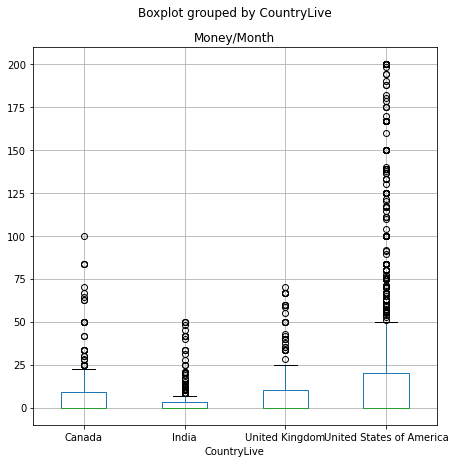

In [225]:
survey_top4_c.boxplot(by="CountryLive",column="Money/Month",figsize=(7,7))

## Recompute Mean $/Month

In [226]:
country_group = survey_top4_c.groupby("CountryLive")
country_group["Money/Month"].mean().sort_values(ascending=False)

CountryLive
United States of America    20.544038
Canada                       9.234253
United Kingdom               8.875130
India                        3.877864
Name: Money/Month, dtype: float64

This suggests, that USA and Canada are on average more willing to spent the most money on learning (after filtering out values that seem unlikely). But in the following step we will look at the number of customer willing to spend above $59.

In [240]:
country_group2 = survey_filtered[survey_filtered["Money/Month"]>59].groupby("CountryLive")
country_group2["Money/Month"].count().sort_values(ascending=False).head(5)

CountryLive
United States of America    664
India                        75
United Kingdom               43
Canada                       40
Australia                    22
Name: Money/Month, dtype: int64